# Webtask Demo: E-commerce Shopping Cart

This notebook demonstrates automated web interaction using Webtask to add items to a shopping cart.

## 1. Setup

Install dependencies and import required libraries.

In [1]:
!pip install -e .. 

Obtaining file:///Users/stevewang/Github/web-auto/webtask
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for pywebtask (pyproject.toml) ... done
  Created wheel for pywebtask: filename=pywebtask-0.8.11-0.editable-py3-none-any.whl size=4605 sha256=5458abc90c666e096538be301e63ced201ed8a21e23f6ef8befd3c5f6ecb85ff
  Stored in directory: /private/var/folders/gf/f2gq1g_97yl5m14bd6t4chm80000gp/T/pip-ephem-wheel-cache-_rxqcucb/wheels/7b/f0/6f/e5a0e81d9f5259d8dd15015bc30fcbb2ed08e174606e4fc43b
Successfully built pywebtask
  Attempting uninstall: pywebtask
    Found existing installation: pywebtask 0.8.11
    Uninstalling pywebtask-0.8.11:
      Successfully uninstalled pywebtask-0.8.11

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

True

## 2. Initialize Webtask Agent

Create a Webtask instance and configure the LLM.

In [3]:
from webtask import Webtask
from webtask.integrations.llm.openai import OpenAILLM

wt = Webtask()
# OpenAILLM will automatically read OPENAI_API_KEY from environment
llm = OpenAILLM.create(model="gpt-4.1")

/Users/stevewang/Github/web-auto/webtask/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create agent with 2 second delay between actions to allow pages to load
agent = await wt.create_agent(llm=llm, action_delay=3.0)

## 3. Initial State

Navigate to the website and capture the starting state.

Screenshot BEFORE task execution:


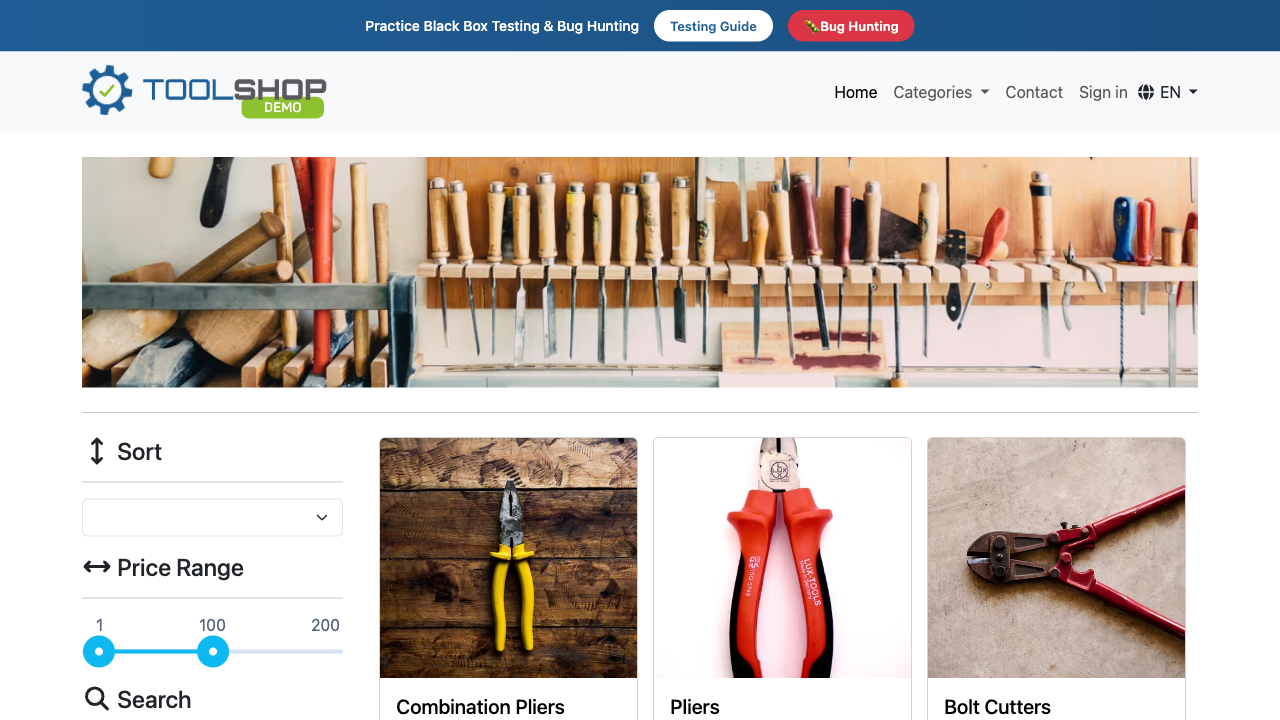

In [5]:
# Navigate to the starting page first
await agent.navigate("https://practicesoftwaretesting.com/")
await agent.wait_for_idle()

# Take screenshot before starting the task
print("Screenshot BEFORE task execution:")
await agent.screenshot("before_task.png")
display(Image(filename="before_task.png", width=800))

## 4. Execute Task

Run the agent to add items to the shopping cart.

In [6]:
# Execute the task step by step
agent.set_task("add 2 Flat-Head Wood Screws and 5 cross-head screws to the cart, and verify by checking the cart")

max_steps = 10
for i in range(max_steps):
    print(f"\n=== Executing Step {i+1} ===")
    step = await agent.run_step()

    print(f"Status: {'Complete' if step.proposal.complete else 'Incomplete'}")
    print(f"Message: {step.proposal.message}")
    print(f"Actions: {len(step.proposal.actions)}")
    for j, action in enumerate(step.proposal.actions, 1):
        print(f"  Action {j}: {action.tool} - {action.reason}")

    if step.proposal.complete:
        print(f"\n✓ Task completed in {i+1} steps!")
        break
else:
    print(f"\n✗ Task not completed after {max_steps} steps")


=== Executing Step 1 ===
Status: Incomplete
Message: To add Flat-Head Wood Screws and cross-head screws, I need to search for these items first using the search bar.
Actions: 2
  Action 1: fill - Search for Flat-Head Wood Screws
  Action 2: click - Submit the search query

=== Executing Step 2 ===
Status: Incomplete
Message: The search for Flat-Head Wood Screws is complete and the item is displayed. Next, I need to view the Flat-Head Wood Screws details to add the quantity (2) to the cart.
Actions: 1
  Action 1: click - View the Flat-Head Wood Screws product details to add a specific quantity.

=== Executing Step 3 ===
Status: Incomplete
Message: Need to set the quantity to 2 for Flat-Head Wood Screws and add it to the cart. Then, navigate to cross-head screws to add 5. Finally, will verify by checking the cart.
Actions: 3
  Action 1: fill - Set quantity of Flat-Head Wood Screws to 2.
  Action 2: click - Add 2 Flat-Head Wood Screws to cart.
  Action 3: click - Navigate to Cross-head s

## 5. Final State

Capture the final state after task completion.

Screenshot AFTER task execution:


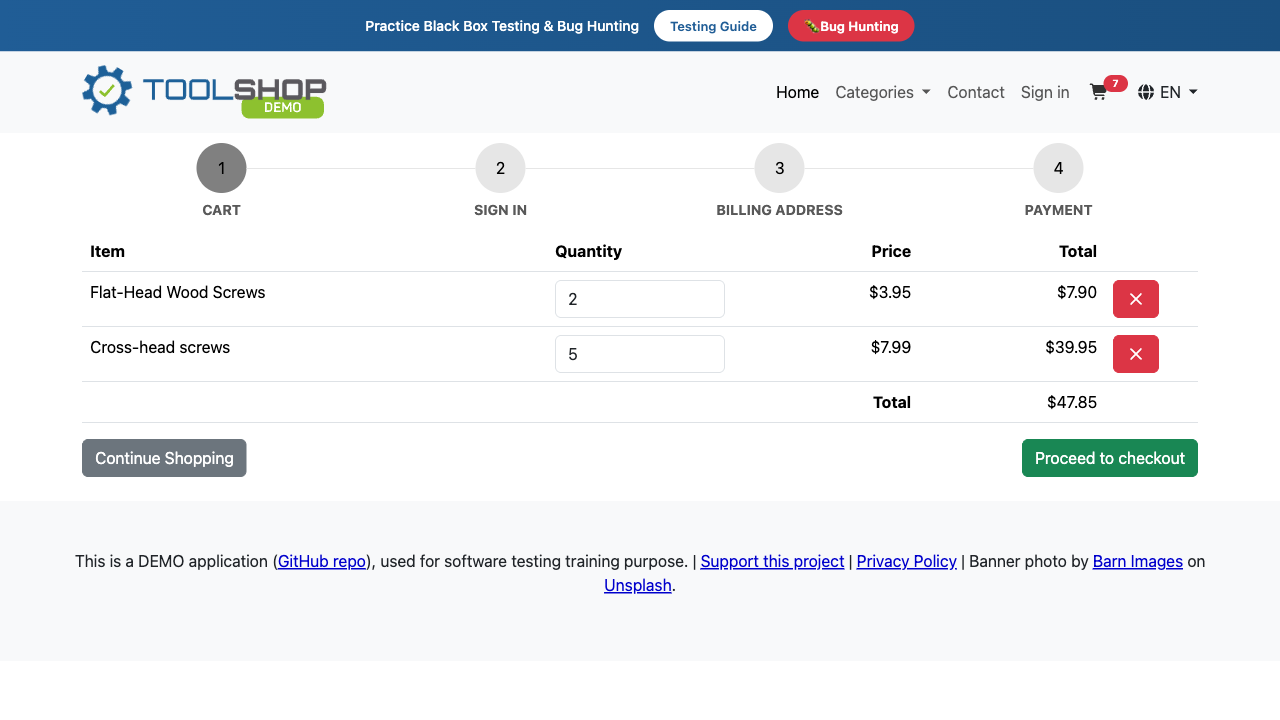

In [7]:
# Take screenshot after task completion
print("Screenshot AFTER task execution:")
await agent.screenshot("after_task.png")
display(Image(filename="after_task.png", width=800))